# **Mini Project on Brain Tumor Classification**

Importing Essential Libraries

In [ ]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import cv2
import matplotlib.pyplot as plt 
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam 
import os
import ipywidgets as widgets
import io
from PIL import Image
from IPython.display import display,clear_output
import numpy as np

In [ ]:
from glob import glob
import pathlib
import pandas as pd
import numpy as np
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tqdm import tqdm
from PIL import ImageEnhance
from google.colab.patches import cv2_imshow
import warnings
warnings.filterwarnings("ignore")

Loading the Data Set using Kaggle API Token

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "(name)" with length (length) bytes'.format(name=fn, length=len(uploaded[fn])))

!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json 

Saving kaggle.json to kaggle.json
User uploaded file "(name)" with length (length) bytes


In [ ]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri

 93% 81.0M/86.8M [00:00<00:00, 111MB/s] 
100% 86.8M/86.8M [00:00<00:00, 94.0MB/s]


Extracting the downloaded data from Zip

In [ ]:
from zipfile import ZipFile
file_name = "/content/brain-tumor-classification-mri.zip"
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [ ]:
file = '/content/Training/glioma_tumor/*.jpg' 
glob(file)
# Using List Comprehension to read all images
sample1 = [cv2.imread(image) for image in glob(file)]

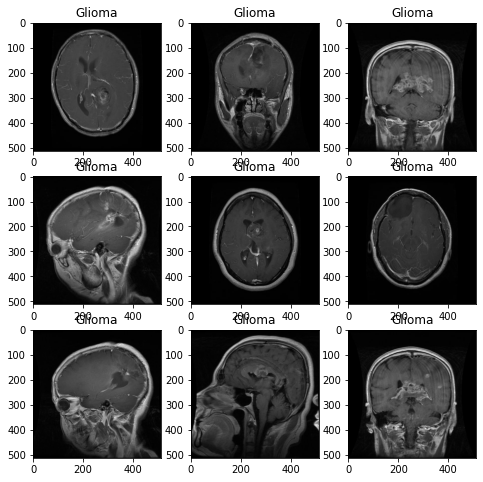

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample1[j])
  plt.title("Glioma")
plt.show()

In [ ]:
file = '/content/Training/meningioma_tumor/*.jpg' 
glob(file)
# Using List Comprehension to read all images
sample2 = [cv2.imread(image) for image in glob(file)]

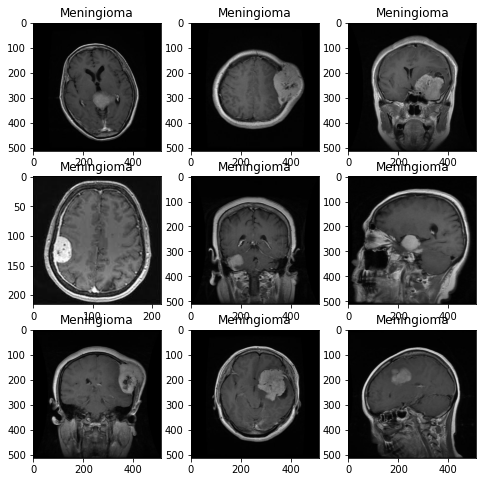

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample2[j])
  plt.title("Meningioma")
plt.show()

In [ ]:
file = '/content/Training/pituitary_tumor/*.jpg' 
glob(file)
# Using List Comprehension to read all images
sample3 = [cv2.imread(image) for image in glob(file)]

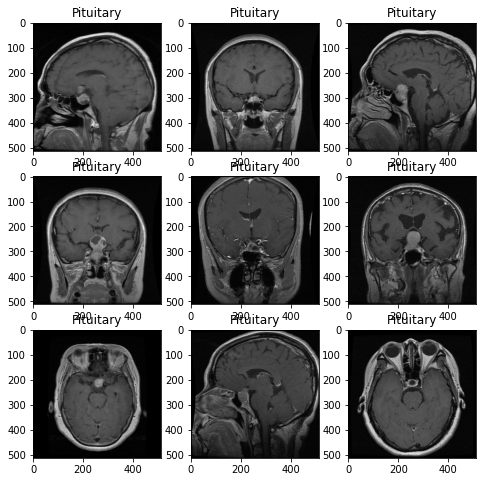

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample3[j])
  plt.title("Pituitary")
plt.show()

In [ ]:
file = '/content/Training/no_tumor/*.jpg' 
glob(file)
# Using List Comprehension to read all images
sample4 = [cv2.imread(image) for image in glob(file)]

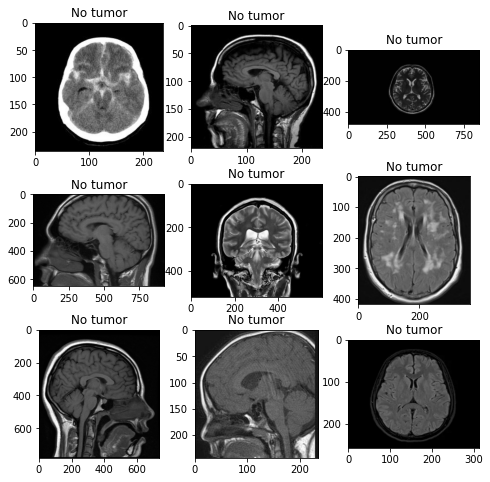

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample4[j])
  plt.title("No tumor")
plt.show()

In [ ]:
file = '/content/Testing/glioma_tumor/*.jpg' 
glob(file)
# Using List Comprehension to read all images
sample5 = [cv2.imread(image) for image in glob(file)]

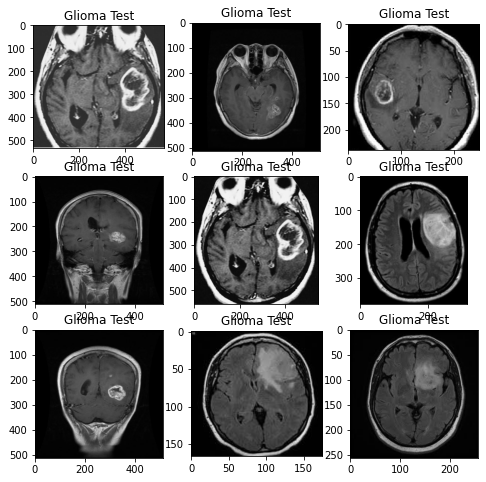

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample5[j])
  plt.title("Glioma Test")
plt.show()

In [ ]:
file = '/content/Testing/meningioma_tumor/*.jpg' 
glob(file)
# Using List Comprehension to read all images
sample6 = [cv2.imread(image) for image in glob(file)]

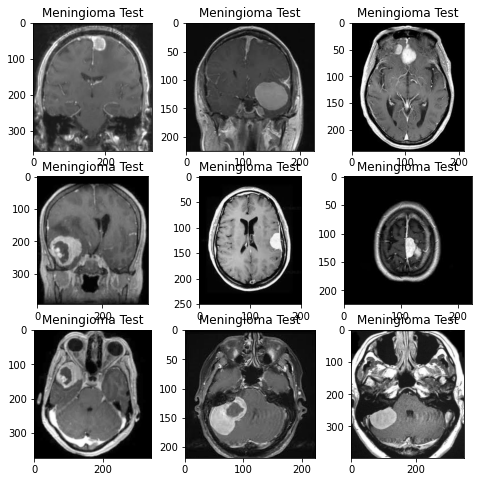

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample6[j])
  plt.title("Meningioma Test")
plt.show()

In [ ]:
file = '/content/Testing/pituitary_tumor/*.jpg' 
glob(file)
# Using List Comprehension to read all images
sample7 = [cv2.imread(image) for image in glob(file)]

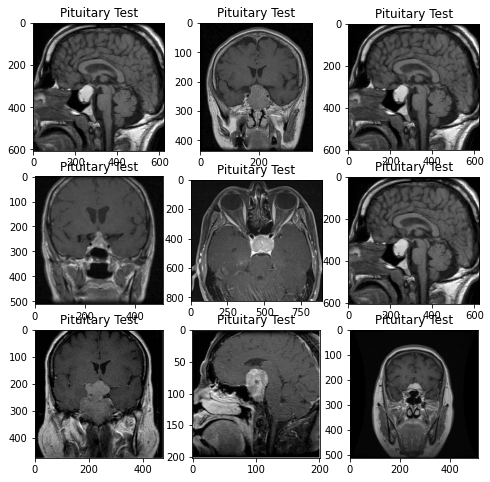

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample7[j])
  plt.title("Pituitary Test")
plt.show()

In [ ]:
file = '/content/Testing/no_tumor/*.jpg' 
glob(file)
# Using List Comprehension to read all images
sample8 = [cv2.imread(image) for image in glob(file)]

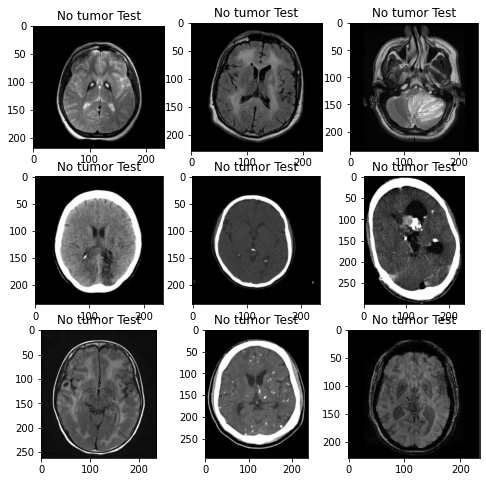

In [ ]:
# Define a figure of size (8, 8)
fig=plt.figure(figsize=(8, 8))
# Define row and cols in the figure
rows, cols = 3, 3
# Display first four images
for j in range(0, cols*rows):
  fig.add_subplot(rows, cols, j+1)
  plt.imshow(sample8[j])
  plt.title("No tumor Test")
plt.show()

Splitting the data

In [ ]:
train_img = []
train_labels = []

test_img = []
test_labels = []

path_train = ('/content/Training/')
path_test = ('/content/Testing/')
img_size= 300

for i in os.listdir(path_train):
    for j in os.listdir(path_train+i):
        train_img.append (cv2.resize(cv2.imread(path_train+i+'/'+j), (img_size,img_size))) 
        train_labels.append(i)
        
for i in os.listdir(path_test):
    for j in os.listdir(path_test+i):
        test_img.append (cv2.resize(cv2.imread(path_test+i+'/'+j), (img_size,img_size))) 
        test_labels.append(i)
        
train_img = (np.array(train_img))
test_img = (np.array(test_img))


train_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(train_labels)]
test_labels_encoded = [0 if category == 'no_tumor' else(1 if category == 'glioma_tumor' else(2 if category=='meningioma_tumor' else 3)) for category in list(test_labels)]

In [ ]:
print("Shape of train: ",(train_img).shape," and shape of test: ", (test_img).shape)

Shape of train:  (2870, 300, 300, 3)  and shape of test:  (394, 300, 300, 3)


Illumination Boosting

In [ ]:

# Set the directory containing the original images
directory1 = '/content/Training/glioma_tumor/'

# Loop through the files in the directory
for filename in os.listdir(directory1):
  # Skip any files that are not images
  if not filename.endswith('.jpg') and not filename.endswith('.png'):
    continue

  # Open the image file
  imageb1 = Image.open(os.path.join(directory1, filename))

  # Increase the brightness by 50%
  brightness = 1.5
  enhancer = ImageEnhance.Brightness(imageb1)
  imageb1 = enhancer.enhance(brightness)

  # Save the enhanced image with a new filename
  new_filename = 'bright_' + filename
  imageb1.save(os.path.join(directory1, new_filename))

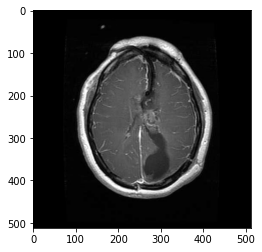

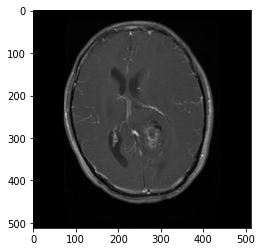

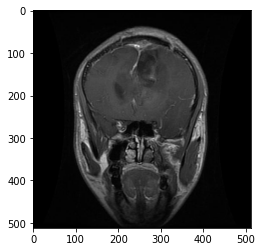

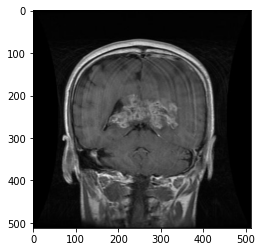

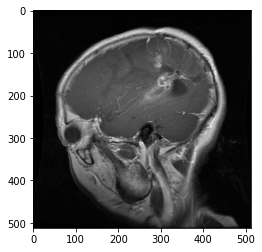

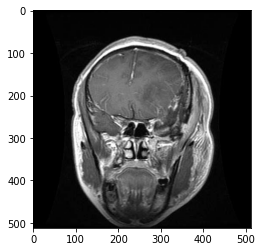

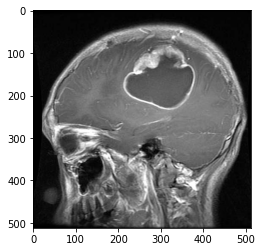

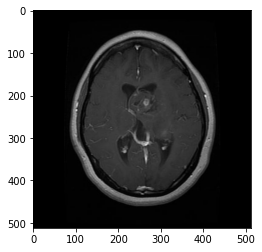

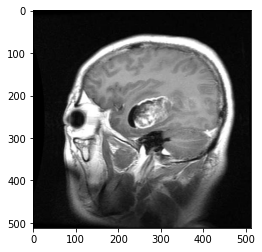

In [ ]:
image_files = glob('/content/Training/glioma_tumor/*.jpg')

# Use matplotlib to display the first 5 images
for image in image_files[:9]:
    img = plt.imread(image)
    plt.imshow(img)
    plt.show()

In [ ]:
# Set the directory containing the original images
directory2 = '/content/Training/meningioma_tumor/'

# Loop through the files in the directory
for filename in os.listdir(directory2):
  # Skip any files that are not images
  if not filename.endswith('.jpg') and not filename.endswith('.png'):
    continue

  # Open the image file
  imageb2 = Image.open(os.path.join(directory2, filename))

  # Increase the brightness by 50%
  brightness2 = 1.5
  enhancer2 = ImageEnhance.Brightness(imageb2)
  imageb2 = enhancer2.enhance(brightness2)

  # Save the enhanced image with a new filename
  new_filename2 = 'bright_' + filename
  imageb2.save(os.path.join(directory2, new_filename2))

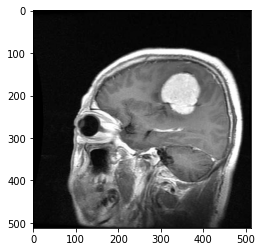

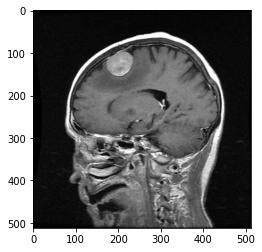

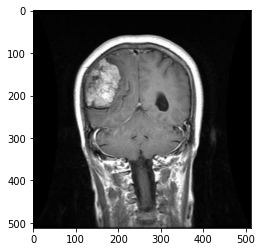

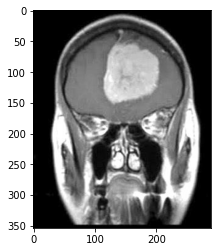

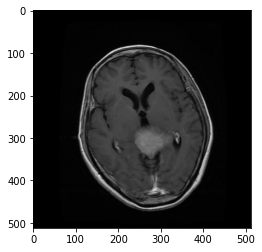

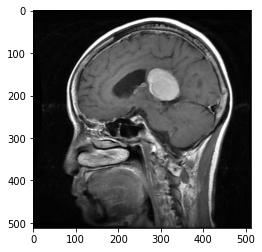

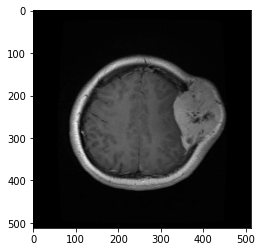

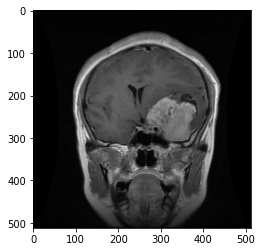

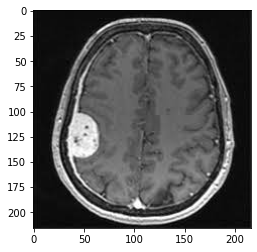

In [ ]:
image_files2 = glob('/content/Training/meningioma_tumor/*.jpg')

# Use matplotlib to display the first 5 images
for image in image_files2[:9]:
    img2 = plt.imread(image)
    plt.imshow(img2)
    plt.show()

In [ ]:
# Set the directory containing the original images
directory3 = '/content/Training/pituitary_tumor/'

# Loop through the files in the directory
for filename in os.listdir(directory3):
  # Skip any files that are not images
  if not filename.endswith('.jpg') and not filename.endswith('.png'):
    continue

  # Open the image file
  imageb3 = Image.open(os.path.join(directory3, filename))

  # Increase the brightness by 50%
  brightness3 = 1.5
  enhancer3 = ImageEnhance.Brightness(imageb3)
  imageb3 = enhancer2.enhance(brightness3)

  # Save the enhanced image with a new filename
  new_filename3 = 'bright_' + filename
  imageb3.save(os.path.join(directory3, new_filename3))

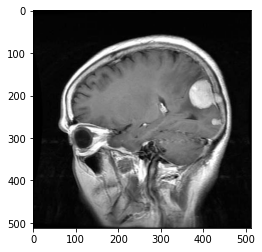

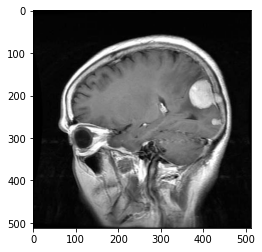

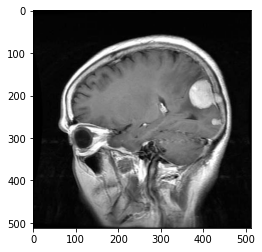

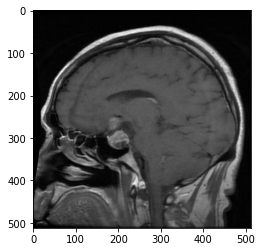

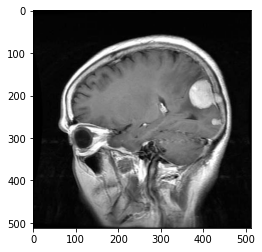

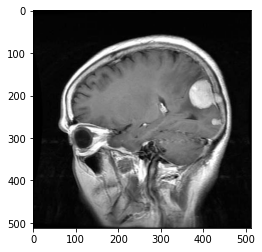

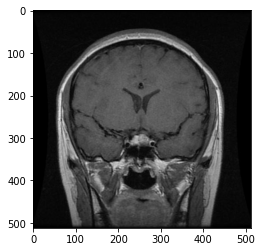

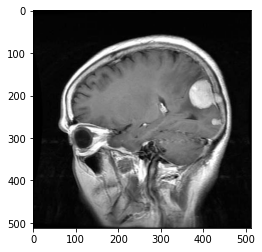

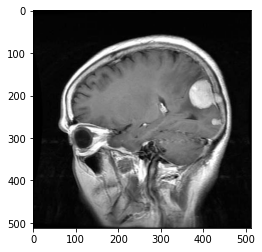

In [ ]:
image_files3 = glob('/content/Training/pituitary_tumor/*.jpg')

# Use matplotlib to display the first 5 images
for image in image_files3[:9]:
    img3 = plt.imread(image)
    plt.imshow(img3)
    plt.show()

In [ ]:
# Set the directory containing the original images
directory4 = '/content/Training/no_tumor/'

# Loop through the files in the directory
for filename in os.listdir(directory4):
  # Skip any files that are not images
  if not filename.endswith('.jpg') and not filename.endswith('.png'):
    continue

  # Open the image file
  imageb4 = Image.open(os.path.join(directory4, filename))

  # Increase the brightness by 50%
  brightness4 = 1.5
  enhancer4 = ImageEnhance.Brightness(imageb4)
  imageb4 = enhancer4.enhance(brightness4)

  # Save the enhanced image with a new filename
  new_filename4 = 'bright_' + filename
  imageb4.save(os.path.join(directory4, new_filename4))

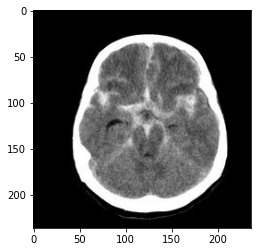

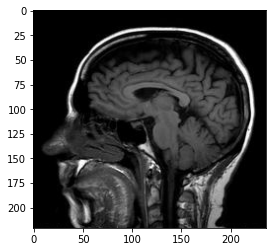

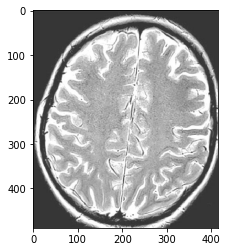

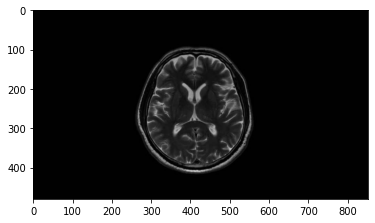

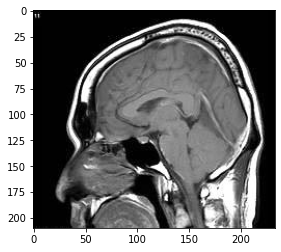

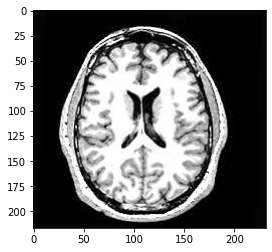

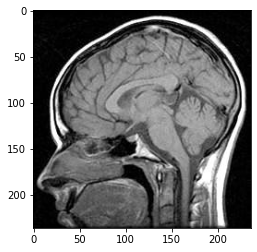

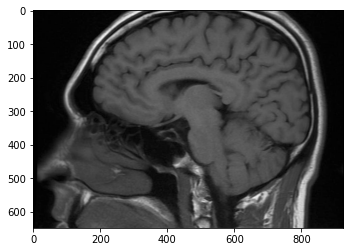

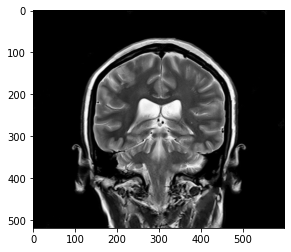

In [ ]:
image_files4 = glob('/content/Training/no_tumor/*.jpg')

# Use matplotlib to display the first 5 images
for image in image_files4[:9]:
    img4 = plt.imread(image)
    plt.imshow(img4)
    plt.show()

In [ ]:
# Set the directory containing the original images
directory5 = '/content/Testing/glioma_tumor/'

# Loop through the files in the directory
for filename in os.listdir(directory5):
  # Skip any files that are not images
  if not filename.endswith('.jpg') and not filename.endswith('.png'):
    continue

  # Open the image file
  imageb5 = Image.open(os.path.join(directory5, filename))

  # Increase the brightness by 50%
  brightness5 = 1.5
  enhancer5 = ImageEnhance.Brightness(imageb5)
  imageb5 = enhancer5.enhance(brightness5)

  # Save the enhanced image with a new filename
  new_filename5 = 'bright_' + filename
  imageb5.save(os.path.join(directory5, new_filename5))

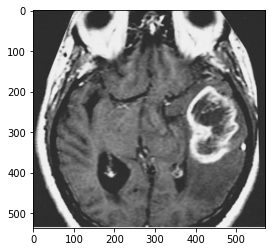

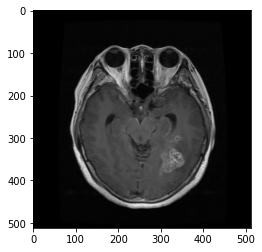

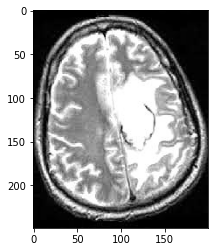

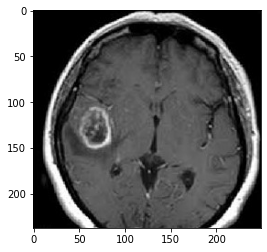

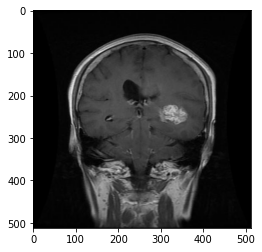

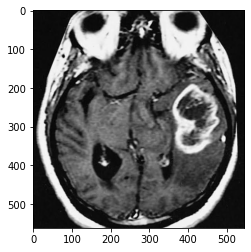

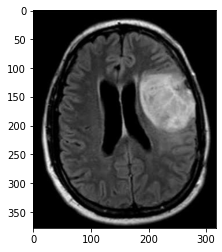

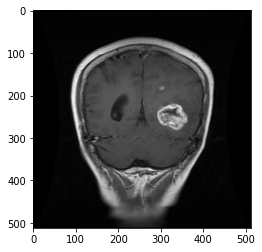

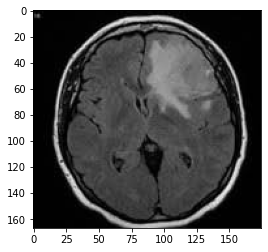

In [ ]:
image_files5 = glob('/content/Testing/glioma_tumor/*.jpg')

# Use matplotlib to display the first 5 images
for image in image_files5[:9]:
    img5 = plt.imread(image)
    plt.imshow(img5)
    plt.show()

In [ ]:
# Set the directory containing the original images
directory6 = '/content/Testing/meningioma_tumor/'

# Loop through the files in the directory
for filename in os.listdir(directory6):
  # Skip any files that are not images
  if not filename.endswith('.jpg') and not filename.endswith('.png'):
    continue

  # Open the image file
  imageb6 = Image.open(os.path.join(directory6, filename))

  # Increase the brightness by 50%
  brightness6 = 1.5
  enhancer6 = ImageEnhance.Brightness(imageb6)
  imageb6 = enhancer6.enhance(brightness6)

  # Save the enhanced image with a new filename
  new_filename6 = 'bright_' + filename
  imageb6.save(os.path.join(directory6, new_filename6))

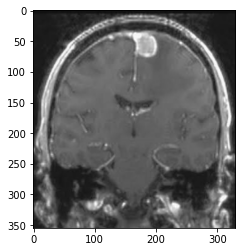

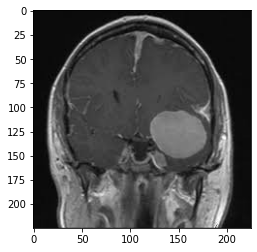

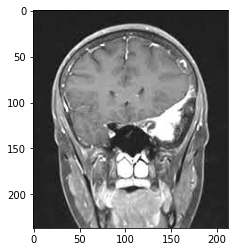

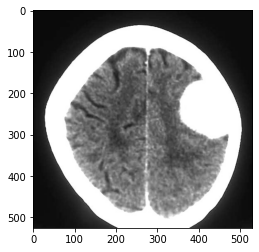

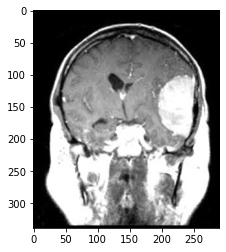

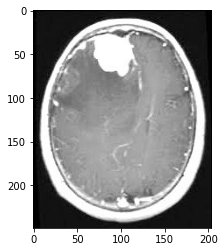

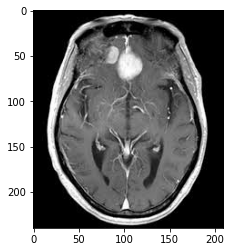

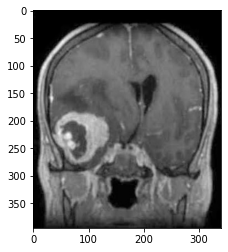

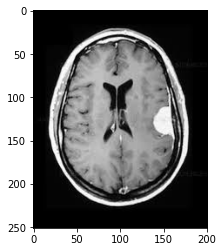

In [ ]:
image_files6 = glob('/content/Testing/meningioma_tumor/*.jpg')

# Use matplotlib to display the first 5 images
for image in image_files6[:9]:
    img6 = plt.imread(image)
    plt.imshow(img6)
    plt.show()

In [ ]:
# Set the directory containing the original images
directory7 = '/content/Testing/pituitary_tumor/'

# Loop through the files in the directory
for filename in os.listdir(directory7):
  # Skip any files that are not images
  if not filename.endswith('.jpg') and not filename.endswith('.png'):
    continue

  # Open the image file
  imageb7 = Image.open(os.path.join(directory7, filename))

  # Increase the brightness by 50%
  brightness7 = 1.5
  enhancer7 = ImageEnhance.Brightness(imageb7)
  imageb7 = enhancer7.enhance(brightness7)

  # Save the enhanced image with a new filename
  new_filename7 = 'bright_' + filename
  imageb7.save(os.path.join(directory7, new_filename7))

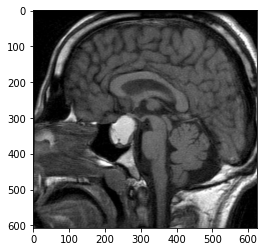

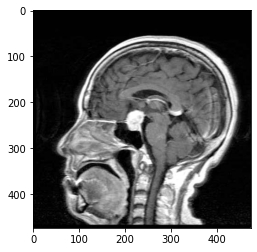

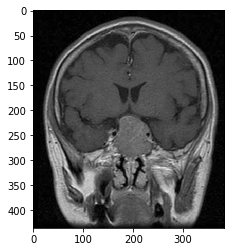

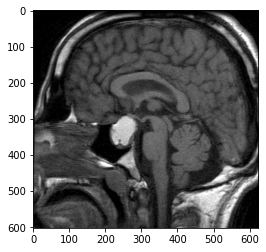

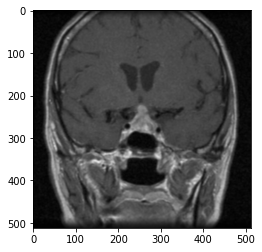

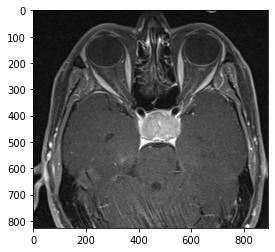

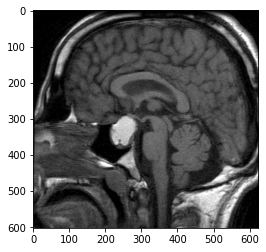

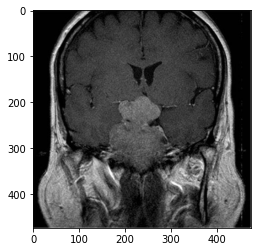

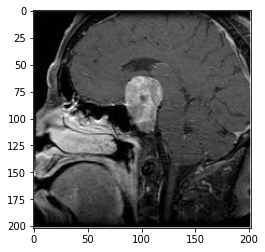

In [ ]:
image_files7 = glob('/content/Testing/pituitary_tumor/*.jpg')

# Use matplotlib to display the first 5 images
for image in image_files7[:9]:
    img7 = plt.imread(image)
    plt.imshow(img7)
    plt.show()

In [ ]:
# Set the directory containing the original images
directory8 = '/content/Testing/no_tumor/'

# Loop through the files in the directory
for filename in os.listdir(directory8):
  # Skip any files that are not images
  if not filename.endswith('.jpg') and not filename.endswith('.png'):
    continue

  # Open the image file
  imageb8 = Image.open(os.path.join(directory8, filename))

  # Increase the brightness by 50%
  brightness8 = 1.5
  enhancer8 = ImageEnhance.Brightness(imageb8)
  imageb8 = enhancer8.enhance(brightness8)

  # Save the enhanced image with a new filename
  new_filename8 = 'bright_' + filename
  imageb8.save(os.path.join(directory8, new_filename8))

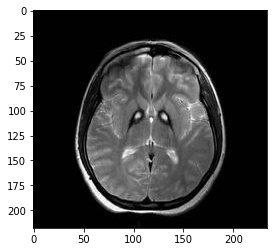

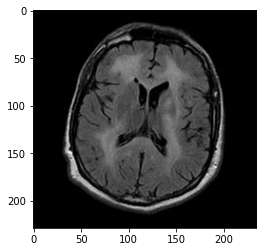

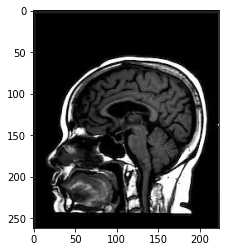

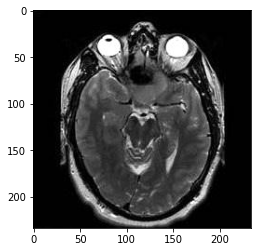

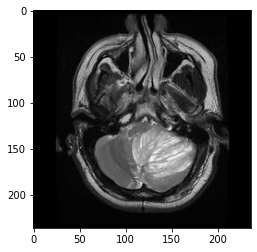

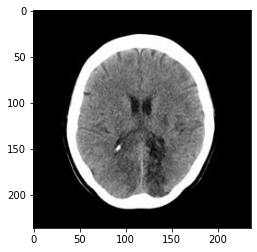

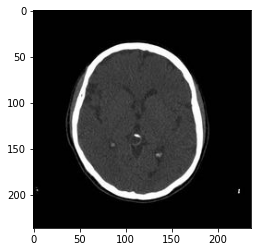

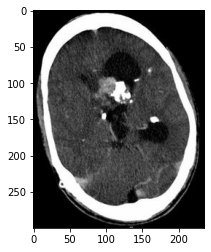

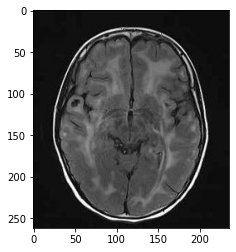

In [ ]:
image_files8 = glob('/content/Testing/no_tumor/*.jpg')

# Use matplotlib to display the first 5 images
for image in image_files8[:9]:
    img8 = plt.imread(image)
    plt.imshow(img8)
    plt.show()

Non Linear Streching

In [ ]:
directorynls1 = "/content/Training/glioma_tumor/"

#loop through all images in the directory
for filename in os.listdir(directorynls1):
  nlsimg1 = cv2.imread(os.path.join(directorynls1,filename))
  #perform non-linear stretching on the image
  stretched_img = np.power(nlsimg1,0.5)

#save the stretched image
cv2.imwrite(os.path.join(directorynls1, "cstretched_"+filename), stretched_img)

True

In [ ]:
#set the directory where the images are located
directorysds1 = "/content/Training/glioma_tumor/"

#set the name prefix for the images to display
name_prefix = "stretched_"

#set the maximum number of images to display
max_images = 9

#loop through all images in the directory
for filename in os.listdir(directorysds1):
    #check if the image starts with the specified name prefix
    if filename.startswith(name_prefix):
        #read the image
        sds1 = cv2.imread(os.path.join(directorysds1,filename))
        
        #display the image
        cv2_imshow(sds1)
        
        #increment the number of images displayed
        max_images -= 1
        
        #exit the loop if the maximum number of images have been displayed
        if max_images == 0:
            break

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
directorynls2 = "/content/Training/meningioma_tumor/"

#loop through all images in the directory
for filename in os.listdir(directorynls2):
  nlsimg2 = cv2.imread(os.path.join(directorynls2,filename))
  #perform non-linear stretching on the image
  stretched_img2 = np.power(nlsimg2,0.5)

#save the stretched image
cv2.imwrite(os.path.join(directorynls2, "cstretched_"+filename), stretched_img2)

True

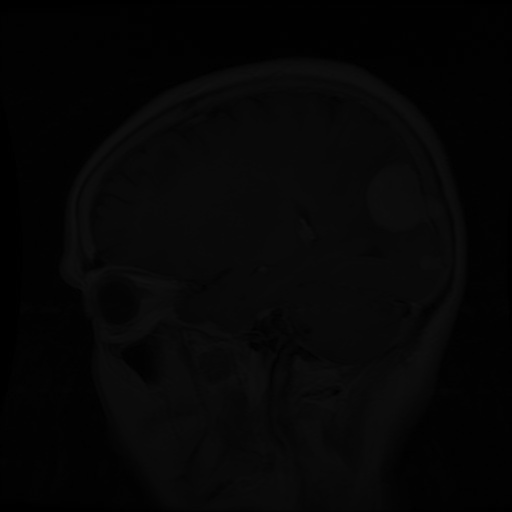

In [ ]:
#set the directory where the images are located
directorysds2 = "/content/Training/meningioma_tumor/"

#set the name prefix for the images to display
name_prefix2 = "cstretched_"

#set the maximum number of images to display
max_images = 9

#loop through all images in the directory
for filename in os.listdir(directorysds2):
    #check if the image starts with the specified name prefix
    if filename.startswith(name_prefix2):
        #read the image
        sds2 = cv2.imread(os.path.join(directorysds2,filename))
        
        #display the image
        cv2_imshow(sds2)
        
        #increment the number of images displayed
        max_images -= 1
        
        #exit the loop if the maximum number of images have been displayed
        if max_images == 0:
            break

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
directorynls3 = "/content/Training/pituitary_tumor/"

#loop through all images in the directory
for filename in os.listdir(directorynls3):
  nlsimg3 = cv2.imread(os.path.join(directorynls3,filename))
  #perform non-linear stretching on the image
  stretched_img3 = np.power(nlsimg3,0.5)

#save the stretched image
cv2.imwrite(os.path.join(directorynls3, "cstretched_"+filename), stretched_img3)

True

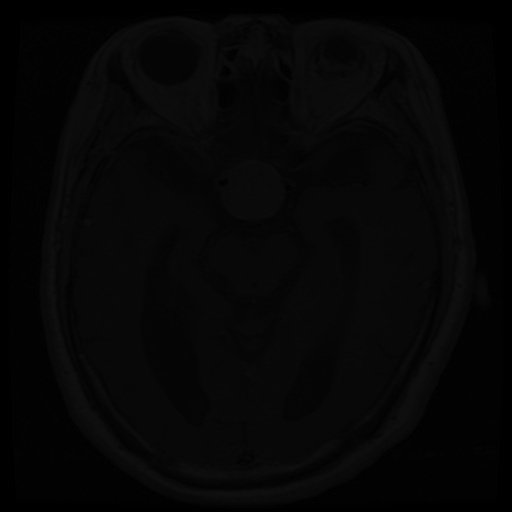

In [ ]:
#set the directory where the images are located
directorysds3 = "/content/Training/pituitary_tumor/"

#set the name prefix for the images to display
name_prefix3 = "cstretched_"

#set the maximum number of images to display
max_images = 9

#loop through all images in the directory
for filename in os.listdir(directorysds3):
    #check if the image starts with the specified name prefix
    if filename.startswith(name_prefix3):
        #read the image
        sds3 = cv2.imread(os.path.join(directorysds3,filename))
        
        #display the image
        cv2_imshow(sds3)
        
        #increment the number of images displayed
        max_images -= 1
        
        #exit the loop if the maximum number of images have been displayed
        if max_images == 0:
            break

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
directorynls4 = "/content/Training/no_tumor/"

#loop through all images in the directory
for filename in os.listdir(directorynls4):
  nlsimg4 = cv2.imread(os.path.join(directorynls4,filename))
  #perform non-linear stretching on the image
  stretched_img4 = np.power(nlsimg4,0.5)

#save the stretched image
cv2.imwrite(os.path.join(directorynls4, "cstretched_"+filename), stretched_img4)

True

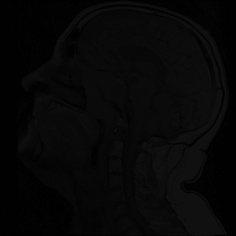

In [ ]:
#set the directory where the images are located
directorysds4 = "/content/Training/no_tumor/"

#set the name prefix for the images to display
name_prefix4 = "cstretched_"

#set the maximum number of images to display
max_images = 9

#loop through all images in the directory
for filename in os.listdir(directorysds4):
    #check if the image starts with the specified name prefix
    if filename.startswith(name_prefix4):
        #read the image
        sds4 = cv2.imread(os.path.join(directorysds4,filename))
        
        #display the image
        cv2_imshow(sds4)
        
        #increment the number of images displayed
        max_images -= 1
        
        #exit the loop if the maximum number of images have been displayed
        if max_images == 0:
            break

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
directorynls5 = "/content/Testing/glioma_tumor/"

#loop through all images in the directory
for filename in os.listdir(directorynls5):
  nlsimg5 = cv2.imread(os.path.join(directorynls5,filename))
  #perform non-linear stretching on the image
  stretched_img5 = np.power(nlsimg5,0.5)

#save the stretched image
cv2.imwrite(os.path.join(directorynls5, "cstretched_"+filename), stretched_img5)

True

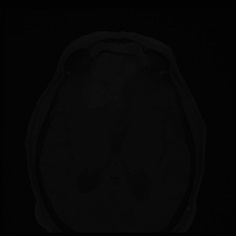

In [ ]:
#set the directory where the images are located
directorysds5 = "/content/Testing/glioma_tumor/"

#set the name prefix for the images to display
name_prefix5 = "cstretched_"

#set the maximum number of images to display
max_images = 9

#loop through all images in the directory
for filename in os.listdir(directorysds5):
    #check if the image starts with the specified name prefix
    if filename.startswith(name_prefix5):
        #read the image
        sds5 = cv2.imread(os.path.join(directorysds5,filename))
        
        #display the image
        cv2_imshow(sds5)
        
        #increment the number of images displayed
        max_images -= 1
        
        #exit the loop if the maximum number of images have been displayed
        if max_images == 0:
            break

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
directorynls6 = "/content/Testing/meningioma_tumor/"

#loop through all images in the directory
for filename in os.listdir(directorynls6):
  nlsimg6 = cv2.imread(os.path.join(directorynls6,filename))
  #perform non-linear stretching on the image
  stretched_img6 = np.power(nlsimg6,0.5)

#save the stretched image
cv2.imwrite(os.path.join(directorynls6, "cstretched_"+filename), stretched_img6)

True

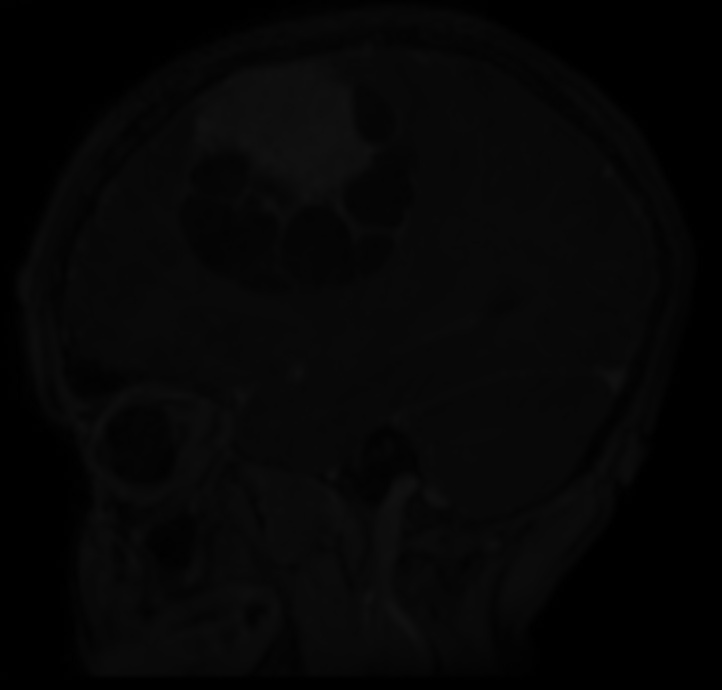

In [ ]:
#set the directory where the images are located
directorysds6 = "/content/Testing/meningioma_tumor/"

#set the name prefix for the images to display
name_prefix6 = "cstretched_"

#set the maximum number of images to display
max_images = 9

#loop through all images in the directory
for filename in os.listdir(directorysds6):
    #check if the image starts with the specified name prefix
    if filename.startswith(name_prefix6):
        #read the image
        sds6 = cv2.imread(os.path.join(directorysds6,filename))
        
        #display the image
        cv2_imshow(sds6)
        
        #increment the number of images displayed
        max_images -= 1
        
        #exit the loop if the maximum number of images have been displayed
        if max_images == 0:
            break

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
directorynls7 = "/content/Testing/pituitary_tumor/"

#loop through all images in the directory
for filename in os.listdir(directorynls7):
  nlsimg7 = cv2.imread(os.path.join(directorynls7,filename))
  #perform non-linear stretching on the image
  stretched_img7 = np.power(nlsimg7,0.5)

#save the stretched image
cv2.imwrite(os.path.join(directorynls7, "cstretched_"+filename), stretched_img7)

True

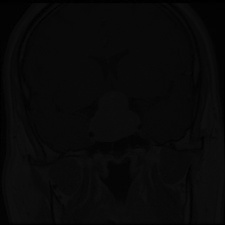

In [ ]:
#set the directory where the images are located
directorysds7 = "/content/Testing/pituitary_tumor/"

#set the name prefix for the images to display
name_prefix7 = "cstretched_"

#set the maximum number of images to display
max_images = 9

#loop through all images in the directory
for filename in os.listdir(directorysds7):
    #check if the image starts with the specified name prefix
    if filename.startswith(name_prefix7):
        #read the image
        sds7 = cv2.imread(os.path.join(directorysds7,filename))
        
        #display the image
        cv2_imshow(sds7)
        
        #increment the number of images displayed
        max_images -= 1
        
        #exit the loop if the maximum number of images have been displayed
        if max_images == 0:
            break

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
directorynls8 = "/content/Testing/no_tumor/"

#loop through all images in the directory
for filename in os.listdir(directorynls8):
  nlsimg8 = cv2.imread(os.path.join(directorynls8,filename))
  #perform non-linear stretching on the image
  stretched_img8 = np.power(nlsimg8,0.5)

#save the stretched image
cv2.imwrite(os.path.join(directorynls8, "cstretched_"+filename), stretched_img8)

True

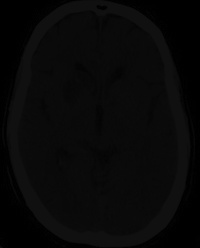

In [ ]:
#set the directory where the images are located
directorysds8 = "/content/Testing/no_tumor/"

#set the name prefix for the images to display
name_prefix8 = "cstretched_"

#set the maximum number of images to display
max_images = 9

#loop through all images in the directory
for filename in os.listdir(directorysds8):
    #check if the image starts with the specified name prefix
    if filename.startswith(name_prefix8):
        #read the image
        sds8 = cv2.imread(os.path.join(directorysds8,filename))
        
        #display the image
        cv2_imshow(sds8)
        
        #increment the number of images displayed
        max_images -= 1
        
        #exit the loop if the maximum number of images have been displayed
        if max_images == 0:
            break

cv2.waitKey(0)
cv2.destroyAllWindows()

Data Augmentation

In [ ]:
img_datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

img_datagen.fit(train_img)
img_datagen.fit(test_img)

In [ ]:
train_x, val_x, train_y, val_y = train_test_split(np.array(train_img), np.array(train_labels), test_size = 0.1)
train_x.shape, train_y.shape, val_x.shape, val_y.shape

((2583, 300, 300, 3), (2583,), (287, 300, 300, 3), (287,))

Some Visualizations

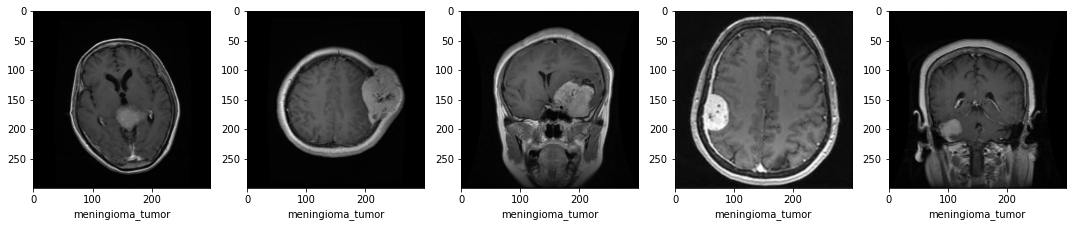

In [ ]:
plt.figure(figsize = (15,15));
for i,j in enumerate(train_img):
    if i<5:
        plt.subplot(1,5,i+1)
        plt.imshow(j);
        plt.xlabel(train_labels[i]);
        plt.tight_layout()
    else:
        break

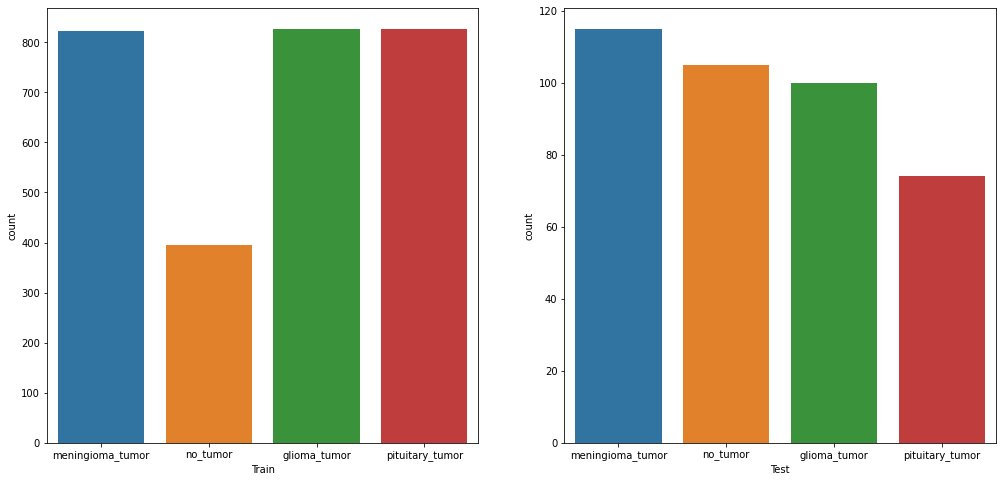

In [ ]:
plt.figure(figsize = (17,8));
lis = ['Train', 'Test']
for i,j in enumerate([train_labels, test_labels]):
    plt.subplot(1,2, i+1);
    sns.countplot(x = j);
    plt.xlabel(lis[i])

Buildingthe CNN Model

In [ ]:
model = tf.keras.Sequential(
        [
          tf.keras.layers.Conv2D(kernel_size=(5,5) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=32, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Conv2D(kernel_size=(3,3) ,filters=64, activation='relu', padding='same'),
          tf.keras.layers.MaxPool2D(pool_size=(2,2)),

          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dropout(rate=0.5),
          tf.keras.layers.Dense(4, activation='softmax')
  ])
model.compile(optimizer=tf.keras.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(tf.cast(train_img, tf.float32), np.array(pd.get_dummies(train_labels)), validation_split=0.1, epochs =20, verbose=1, batch_size=16)

Epoch 1/20
162/162 [==============================] - 374s 2s/step - loss: 1.9457 - accuracy: 0.5532 - val_loss: 0.5194 - val_accuracy: 0.9094
Epoch 2/20
162/162 [==============================] - 370s 2s/step - loss: 0.6252 - accuracy: 0.7565 - val_loss: 0.4999 - val_accuracy: 0.8990
Epoch 3/20
162/162 [==============================] - 369s 2s/step - loss: 0.4659 - accuracy: 0.8238 - val_loss: 0.2821 - val_accuracy: 0.9338
Epoch 4/20
162/162 [==============================] - 382s 2s/step - loss: 0.3780 - accuracy: 0.8571 - val_loss: 0.2585 - val_accuracy: 0.9338
Epoch 5/20
162/162 [==============================] - 377s 2s/step - loss: 0.3173 - accuracy: 0.8777 - val_loss: 0.1761 - val_accuracy: 0.9512
Epoch 6/20
162/162 [==============================] - 367s 2s/step - loss: 0.2323 - accuracy: 0.9102 - val_loss: 0.1963 - val_accuracy: 0.9408
Epoch 7/20
162/162 [==============================] - 368s 2s/step - loss: 0.2250 - accuracy: 0.9210 - val_loss: 0.1932 - val_accuracy: 0.9408

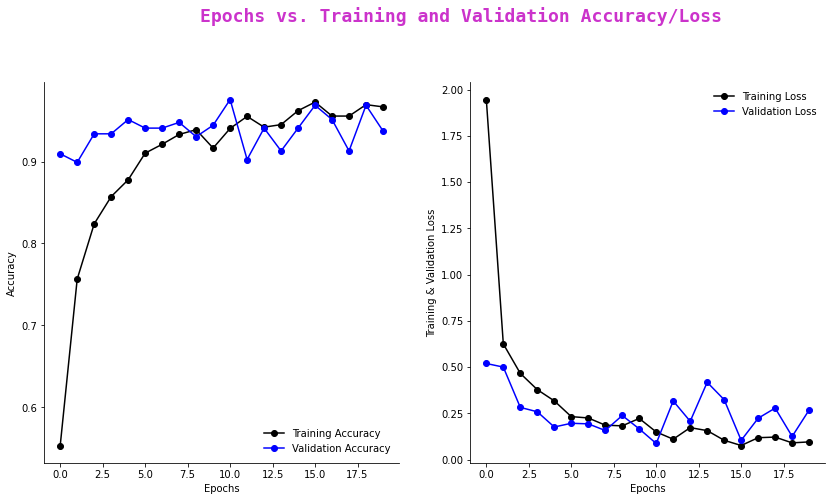

In [ ]:
epochs = [i for i in range(20)]
fig, ax = plt.subplots(1,2,figsize=(14,7))
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

fig.text(s='Epochs vs. Training and Validation Accuracy/Loss',size=18,fontweight='bold',
             fontname='monospace',color='M',y=1,x=0.28,alpha=0.8)

sns.despine()
ax[0].plot(epochs, train_acc, marker='o',markerfacecolor='K',color='K',
           label = 'Training Accuracy')
ax[0].plot(epochs, val_acc, marker='o',markerfacecolor='B',color='B',
           label = 'Validation Accuracy')
ax[0].legend(frameon=False)
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')

sns.despine()
ax[1].plot(epochs, train_loss, marker='o',markerfacecolor='K',color='K',
           label ='Training Loss')
ax[1].plot(epochs, val_loss, marker='o',markerfacecolor='B',color='B',
           label = 'Validation Loss')
ax[1].legend(frameon=False)
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Training & Validation Loss')

fig.show()